In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
os.chdir("../Yolact_fcos/")
# import some common libraries
import json, torch, random, cv2
import matplotlib.pyplot as plt

%matplotlib inline
def cv2_imshow(im):
    plt.figure(figsize = (20,10))
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

# import some common detectron2 utilities
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
# Register Custom Dataset
#BASE_MOUNT = '/home/redne/mnt/project_zero/project_zero/ds1/'
#MASKS_PATHS = os.path.join(BASE_MOUNT, 'experiments/dataset_config')
#IMG_PATHS = os.path.join(BASE_MOUNT, 'parsed')

MASKS_PATHS = '/mnt/zerowastepublic/02-datasets/ds2/dataset_config'
IMG_PATHS = '/mnt/zerowastepublic/02-datasets/ds2/images'


TRAIN_PATH = os.path.join(MASKS_PATHS, 'ds2_3c_train_coco_instances.json')
VAL_PATH = os.path.join(MASKS_PATHS, 'ds2_3c_val_coco_instances.json')
TEST_PATH = os.path.join(MASKS_PATHS, 'ds2_3c_test_coco_instances.json')

register_coco_instances(f"custom_dataset_train", {},TRAIN_PATH , IMG_PATHS)
register_coco_instances(f"custom_dataset_val", {}, VAL_PATH, IMG_PATHS)
register_coco_instances(f"custom_dataset_test", {}, TEST_PATH, IMG_PATHS)

ds_metadata = MetadataCatalog.get("custom_dataset_test")
ds_dicts = DatasetCatalog.get("custom_dataset_test")

print(f'\nMetadata Catalog from custom dataset:\n{ds_metadata}')


Metadata Catalog from custom dataset:
Metadata(evaluator_type='coco', image_root='/mnt/zerowastepublic/02-datasets/ds2/images', json_file='/mnt/zerowastepublic/02-datasets/ds2/dataset_config/ds2_3c_test_coco_instances.json', name='custom_dataset_test', thing_classes=['utensils', 'coffeeCup', 'clearCup'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})


In [4]:
#mymodel = 'yfcos_ds2_r101_x02'
mymodel = 'yfcos_ds2_r50_x08'
yfmnt = f'/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/{mymodel}/'
MODLE_PATH = os.path.join(yfmnt, 'model_final.pth')
MODLE_CFG_PATH = os.path.join(yfmnt, 'config.yaml')


In [5]:
from detectron2.engine import DefaultPredictor
from fcos.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("configs/Yolact/yfcos_ds2_r50_x08.yaml")
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = MODLE_PATH
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model, default was 0.7
#cfg = cfg.merge_from_file(MODLE_CFG_PATH)

print(f'MODEL WEIGHTS: {cfg.MODEL.WEIGHTS}\n')
print(f'MODEL HEADS\n\n{cfg.MODEL.ROI_HEADS}\n\n')
print(f'MODEL DATASETS\n\n{cfg.DATASETS}')


predictor = DefaultPredictor(cfg)

Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


MODEL WEIGHTS: /mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/yfcos_ds2_r50_x08/model_final.pth

MODEL HEADS

BATCH_SIZE_PER_IMAGE: 512
IN_FEATURES: ['res4']
IOU_LABELS: [0, 1]
IOU_THRESHOLDS: [0.5]
NAME: Res5ROIHeads
NMS_THRESH_TEST: 0.5
NUM_CLASSES: 80
POSITIVE_FRACTION: 0.25
PROPOSAL_APPEND_GT: True
SCORE_THRESH_TEST: 0.8


MODEL DATASETS

PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
PROPOSAL_FILES_TEST: ()
PROPOSAL_FILES_TRAIN: ()
TEST: ('custom_dataset_val',)
TRAIN: ('custom_dataset_train',)


/mnt/zerowastepublic/02-datasets/ds2/images/InstanceGroup2Desccamera_0camera_Shape0_iter21_rbg.jpg
/mnt/zerowastepublic/02-datasets/ds2/images/InstanceGroup2Desccamera_0camera_Shape0_iter319_rbg.jpg
/mnt/zerowastepublic/02-datasets/ds2/images/InstanceGroup2Desccamera_0camera_Shape0_iter59_rbg.jpg
/mnt/zerowastepublic/02-datasets/ds2/images/InstanceGroup2Desccamera_0camera_Shape0_iter360_rbg.jpg


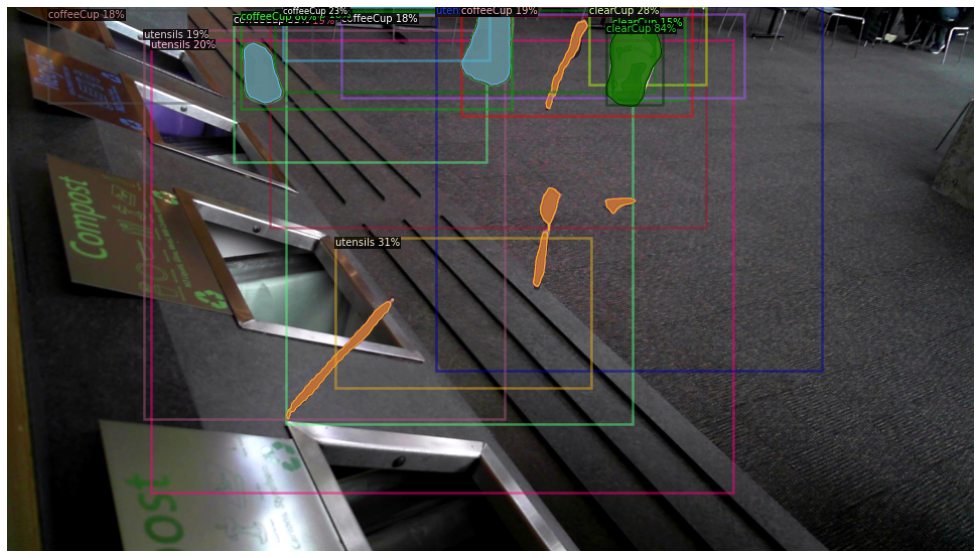

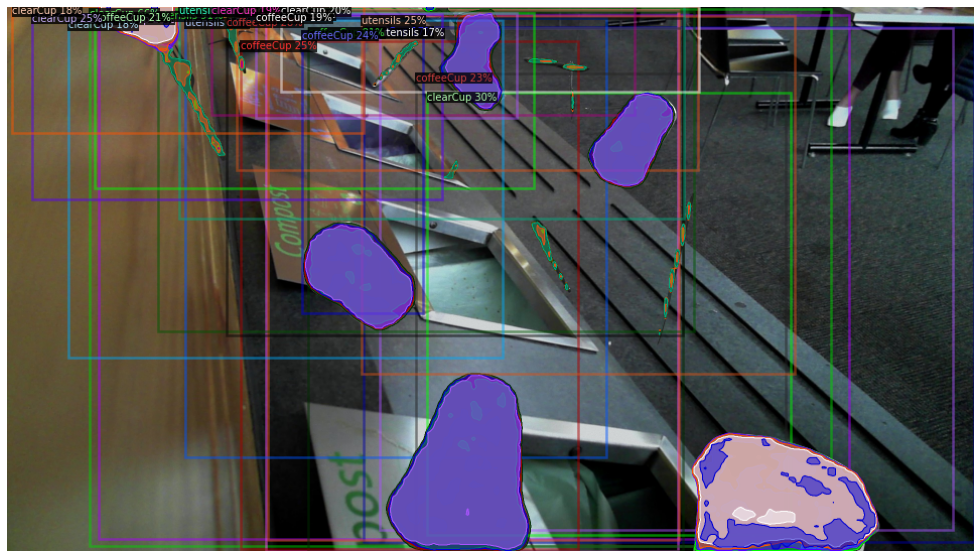

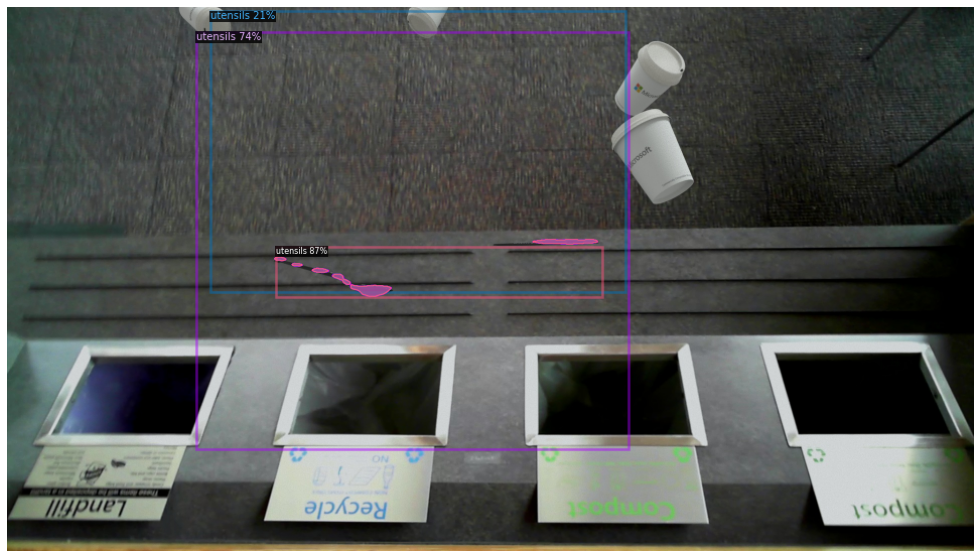

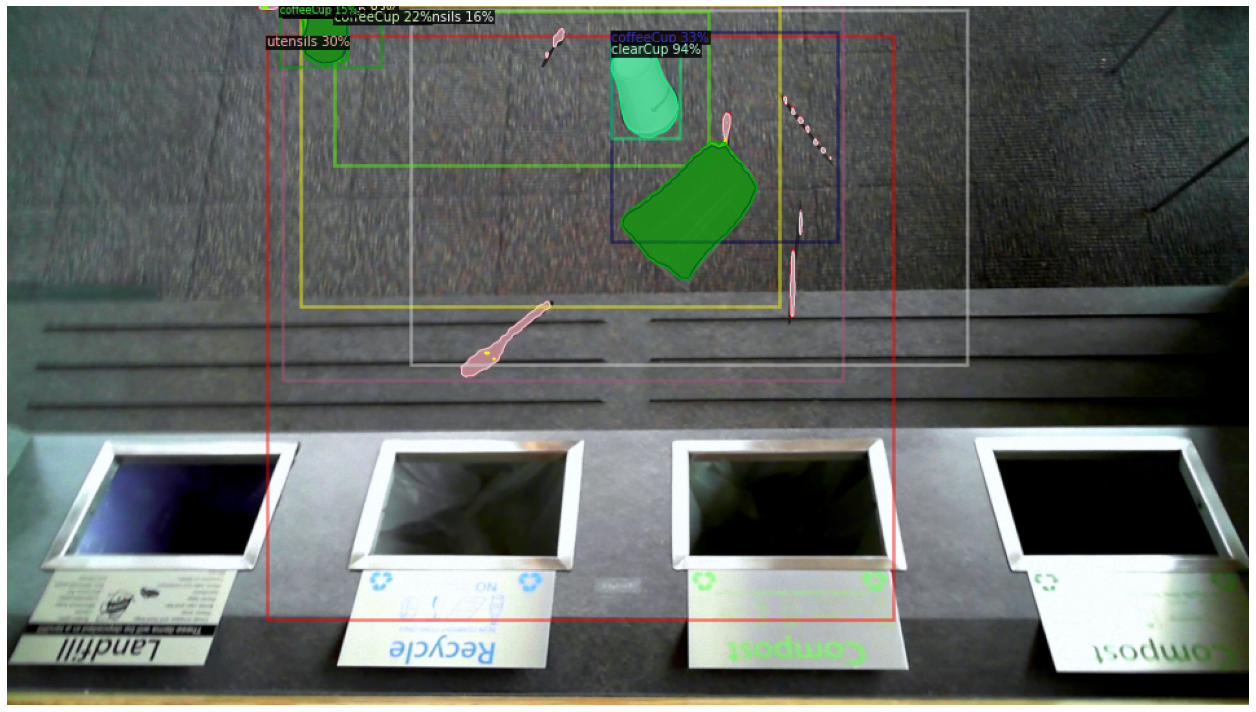

In [6]:
for d in random.sample(ds_dicts, 4):
    img = cv2.imread(d["file_name"])
    print(d['file_name'])
    outputs = predictor(img)
    visualizer = Visualizer(img[:, :, ::-1], metadata=ds_metadata, scale=0.5)
    #vis = visualizer.draw_dataset_dict(d)
    vis = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    #plt.figure(figsize = (20,10))
    cv2_imshow(vis.get_image()[:, :, ::-1])
    #plt.imshow(vis.get_image()[:, :, ::-1])
    #plt.show()
plt.tight_layout()